In [34]:
#Installing the required libraries
pip install torch torchvision torchsummary numpy matplotlib scikit-learn tqdm

Note: you may need to restart the kernel to use updated packages.


In [36]:
# Import necessary library
import os

# Define dataset paths
dataset_path = './FacialExpressions_dataset'
train_folder_path = os.path.join(dataset_path, 'train')
validation_folder_path = os.path.join(dataset_path, 'validation')

# Check the paths
print(f"Train folder path: {train_folder_path}")
print(f"Validation folder path: {validation_folder_path}")


Train folder path: ./FacialExpressions_dataset/train
Validation folder path: ./FacialExpressions_dataset/validation


In [37]:
import os

# Verify paths
train_folder_path = '/Users/srujanareddychireddy/Downloads/AI_project/FacialExpressions_dataset/train'
validation_folder_path = '/Users/srujanareddychireddy/Downloads/AI_project/FacialExpressions_dataset/validation'

def check_folder(folder_path):
    if os.path.exists(folder_path):
        print(f"Contents of {folder_path}: {os.listdir(folder_path)}")
    else:
        print(f"Error: {folder_path} does not exist.")

check_folder(train_folder_path)
check_folder(validation_folder_path)


Contents of /Users/srujanareddychireddy/Downloads/AI_project/FacialExpressions_dataset/train: ['happy', '.DS_Store', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust']
Contents of /Users/srujanareddychireddy/Downloads/AI_project/FacialExpressions_dataset/validation: ['happy', '.DS_Store', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust']


In [24]:
print(f"Train folder path: {train_folder_path}")
print(f"Validation folder path: {validation_folder_path}")


Train folder path: /Users/srujanareddychireddy/Downloads/AI_project/FacialExpressions_dataset/train
Validation folder path: /Users/srujanareddychireddy/Downloads/AI_project/FacialExpressions_dataset/validation


In [25]:
import os
print(f"Current Working Directory: {os.getcwd()}")


Current Working Directory: /Users/srujanareddychireddy


In [ ]:
dataset_path = '/Users/srujanareddychireddy/Downloads/AI_Project/FacialExpressions_dataset'
train_folder_path = os.path.join(dataset_path, 'train')


In [26]:
if os.path.exists(train_folder_path):
    print("Train folder exists")
else:
    print("Train folder does not exist")


Train folder exists


In [27]:
import os

# Update with the absolute path of your dataset
dataset_path = '/Users/srujanareddychireddy/Downloads/AI_Project/FacialExpressions_dataset'

# Create paths to train and validation directories
train_folder_path = os.path.join(dataset_path, 'train')
validation_folder_path = os.path.join(dataset_path, 'validation')

# Verify that the paths are correct by listing the files
print(os.listdir(train_folder_path))  # This should list the contents of the 'train' folder
print(os.listdir(validation_folder_path))  # This should list the contents of the 'validation' folder


['happy', '.DS_Store', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust']
['happy', '.DS_Store', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust']


In [29]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations for the dataset
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224 (standard for vision models)
    transforms.ToTensor(),          # Convert to PyTorch tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize to [-1, 1]
])

# Load training and validation datasets
train_dataset = datasets.ImageFolder(root=train_folder_path, transform=data_transforms)
validation_dataset = datasets.ImageFolder(root=validation_folder_path, transform=data_transforms)

# Create data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=32, shuffle=False)


In [30]:
#Defining the model
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary  # If it's not installed, you can ignore this line.

class CompactConvolutionalTransformer(nn.Module):
    def __init__(self, num_classes=7):
        super(CompactConvolutionalTransformer, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        
        self.fc1 = nn.Linear(64*28*28, 512)  # Adjust the dimensions according to your image size
        self.fc2 = nn.Linear(512, num_classes)
        
        self.pool = nn.MaxPool2d(2, 2)  # Pooling layer for downsampling
    
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        
        # Flatten the output of the convolution layers
        x = x.view(-1, 64*28*28)
        
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)  # Output layer
        
        return x

# Initialize the model, loss function, and optimizer
model = CompactConvolutionalTransformer(num_classes=7)  # Adjust the number of classes if needed
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Print the model summary
summary(model, (3, 224, 224))  # For a 224x224 image input with 3 color channels (RGB)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 224, 224]             448
         MaxPool2d-2         [-1, 16, 112, 112]               0
            Conv2d-3         [-1, 32, 112, 112]           4,640
         MaxPool2d-4           [-1, 32, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          18,496
         MaxPool2d-6           [-1, 64, 28, 28]               0
            Linear-7                  [-1, 512]      25,690,624
            Linear-8                    [-1, 7]           3,591
Total params: 25,717,799
Trainable params: 25,717,799
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/backward pass size (MB): 13.40
Params size (MB): 98.11
Estimated Total Size (MB): 112.08
----------------------------------------------------------------


In [32]:
# Loss function and optimizer
try:
    criterion = nn.CrossEntropyLoss()  # For multi-class classification
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # Experiment with learning rate
    print("Loss function and optimizer initialized successfully.")
except Exception as e:
    print(f"My bad! Something went wrong: {e}")


Loss function and optimizer initialized successfully.


In [40]:
# Import tqdm to use the progress bar
from tqdm import tqdm

# Number of epochs
num_epochs = 10  

for epoch in range(num_epochs):
    print(f"Epoch [{epoch + 1}/{num_epochs}]")
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training loop with progress bar
    for inputs, labels in tqdm(train_loader, desc="Training"):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()  # Zero the gradients

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Update metrics
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Epoch statistics
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")

    # Validation phase
    print("Evaluating on validation data...")
    model.eval()  # Set the model to evaluation mode
    val_correct = 0
    val_total = 0
    with torch.no_grad():  # Disable gradient computation for validation
        for inputs, labels in validation_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    # Validation statistics
    print(f"Validation Accuracy: {100 * val_correct / val_total:.2f}%\n")


Epoch [1/10]



raining: 100%|███████████████████████████████| 901/901 [07:54<00:00,  1.90it/s]

Epoch [1/10], Loss: 1.6195, Accuracy: 36.28%
Evaluating on validation data...
Validation Accuracy: 43.09%

Epoch [2/10]



raining: 100%|███████████████████████████████| 901/901 [08:28<00:00,  1.77it/s]

Epoch [2/10], Loss: 1.3215, Accuracy: 49.19%
Evaluating on validation data...
Validation Accuracy: 49.58%

Epoch [3/10]



raining: 100%|███████████████████████████████| 901/901 [08:30<00:00,  1.76it/s]

Epoch [3/10], Loss: 0.9980, Accuracy: 62.48%
Evaluating on validation data...
Validation Accuracy: 51.85%

Epoch [4/10]



raining: 100%|███████████████████████████████| 901/901 [08:37<00:00,  1.74it/s]

Epoch [4/10], Loss: 0.5284, Accuracy: 81.35%
Evaluating on validation data...
Validation Accuracy: 50.91%

Epoch [5/10]



raining: 100%|█████████████████████████████| 901/901 [1:54:20<00:00,  7.61s/it]

Epoch [5/10], Loss: 0.1853, Accuracy: 94.57%
Evaluating on validation data...
Validation Accuracy: 50.58%

Epoch [6/10]



raining: 100%|███████████████████████████████| 901/901 [12:01<00:00,  1.25it/s]

Epoch [6/10], Loss: 0.0962, Accuracy: 97.66%
Evaluating on validation data...
Validation Accuracy: 49.24%

Epoch [7/10]



raining: 100%|███████████████████████████████| 901/901 [51:19<00:00,  3.42s/it]

Epoch [7/10], Loss: 0.0701, Accuracy: 98.56%
Evaluating on validation data...
Validation Accuracy: 50.76%

Epoch [8/10]



raining: 100%|███████████████████████████████| 901/901 [08:37<00:00,  1.74it/s]

Epoch [8/10], Loss: 0.0633, Accuracy: 98.65%
Evaluating on validation data...
Validation Accuracy: 50.24%

Epoch [9/10]



raining: 100%|███████████████████████████████| 901/901 [33:37<00:00,  2.24s/it]

Epoch [9/10], Loss: 0.0616, Accuracy: 98.67%
Evaluating on validation data...
Validation Accuracy: 49.02%

Epoch [10/10]



raining: 100%|███████████████████████████████| 901/901 [58:38<00:00,  3.90s/it]

Epoch [10/10], Loss: 0.0509, Accuracy: 98.94%
Evaluating on validation data...
Validation Accuracy: 49.07%



In [43]:
#defining the test loader
from torchvision import datasets, transforms
import torch

# Define the path to the test folder
test_folder_path = "/Users/srujanareddychireddy/Downloads/AI_project/FacialExpressions_dataset/test"

# Define the transformations for the test dataset
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to the input size of the model
    transforms.ToTensor(),         # Convert images to PyTorch tensors
    transforms.Normalize([0.5], [0.5])  # Normalize the images
])

# Load the test dataset
test_dataset = datasets.ImageFolder(test_folder_path, transform=test_transforms)

# Create a DataLoader for the test dataset
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=32, shuffle=False, num_workers=4
)

# Print to confirm the test loader is working
print(f"Test dataset loaded with {len(test_dataset)} images in {len(test_dataset.classes)} classes.")



Test dataset loaded with 141 images in 7 classes.


In [45]:
# Set the model to evaluation mode
model.eval()

# Initialize variables for tracking performance
test_correct = 0
test_total = 0

# Disable gradient computation for testing
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

# Calculate and print the test accuracy
test_accuracy = 100 * test_correct / test_total
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 70.21%


In [46]:
#Analyzing the model performance
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Collect predictions and labels
all_labels = []
all_preds = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Confusion matrix and classification report
cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(all_labels, all_preds))


Confusion Matrix:
 [[13  1  1  1  3  2  0]
 [ 0 15  4  0  0  0  1]
 [ 2  0 15  2  0  1  0]
 [ 0  0  2 13  3  2  0]
 [ 3  0  2  1 11  1  2]
 [ 0  0  0  1  1 18  0]
 [ 0  1  3  1  1  0 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.62      0.67        21
           1       0.88      0.75      0.81        20
           2       0.56      0.75      0.64        20
           3       0.68      0.65      0.67        20
           4       0.58      0.55      0.56        20
           5       0.75      0.90      0.82        20
           6       0.82      0.70      0.76        20

    accuracy                           0.70       141
   macro avg       0.71      0.70      0.70       141
weighted avg       0.71      0.70      0.70       141



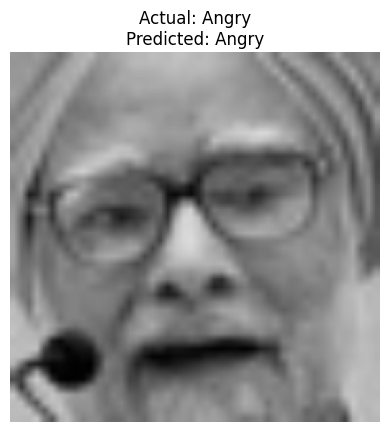

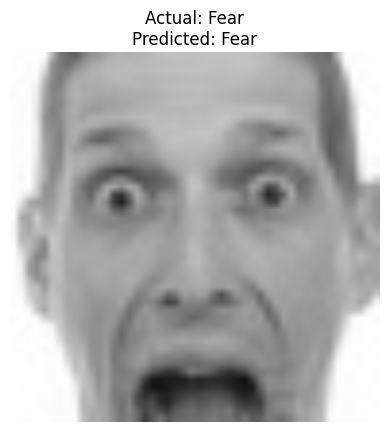

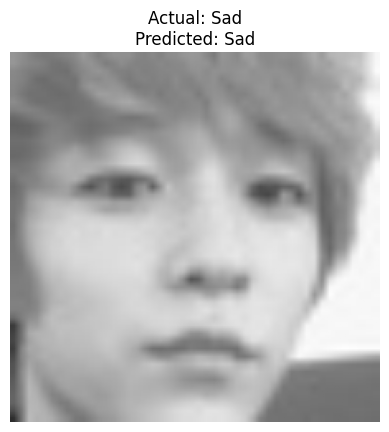

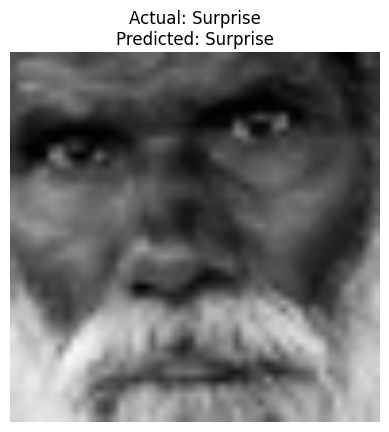

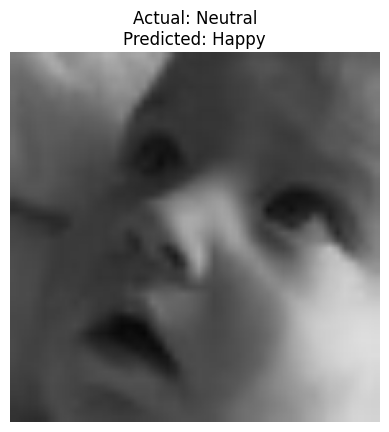

In [51]:
import random

class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Function to display images with actual and predicted labels
def visualize_predictions(model, test_loader, class_names, device, num_images=5):
    model.eval()  # Set the model to evaluation mode
    images_shown = 0
    
    with torch.no_grad():  # Disable gradient computation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            # for i in range(inputs.size(0)):
            i = random.randint(0,inputs.size(0)-1)
            
            if images_shown >= num_images:  # Stop after showing the desired number of images
                return
            
            # Convert the image back to numpy format
            image = inputs[i].cpu().permute(1, 2, 0).numpy()
            image = (image * 0.5) + 0.5  # Undo normalization (mean=0.5, std=0.5)
            image = np.clip(image, 0, 1)  # Ensure pixel values are in [0, 1]
            
            plt.imshow(image)
            plt.title(f"Actual: {class_names[labels[i]]}\nPredicted: {class_names[predicted[i]]}")
            plt.axis("off")
            plt.show()
            
            images_shown += 1

# Example usage
visualize_predictions(model, test_loader, class_names, device, num_images=5)
